In [46]:
# Import preliminary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Review the data
data = pd.read_csv('datasets/housing.csv',names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
                                                'LSTAT','MEDV'],delim_whitespace=True)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [47]:
# Check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [29]:
#Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

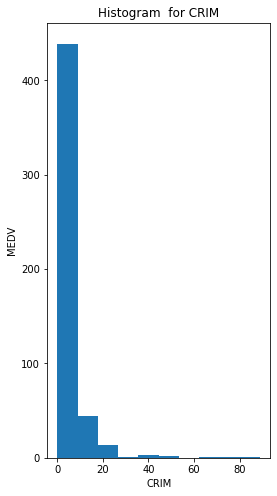

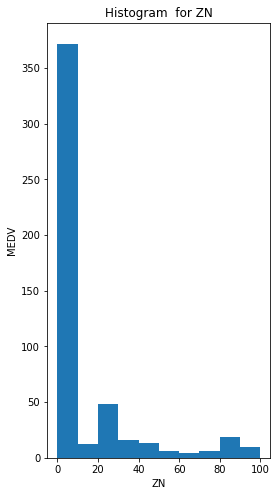

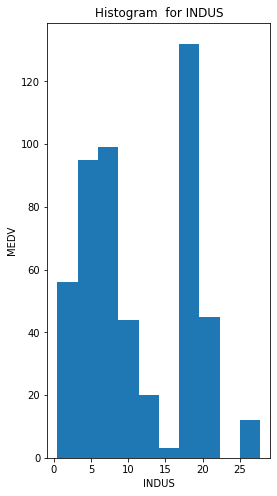

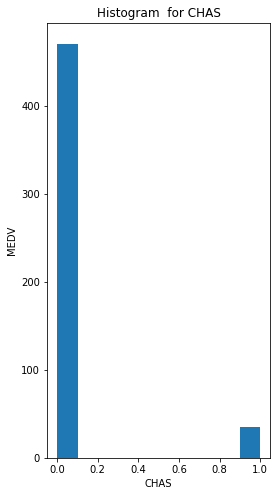

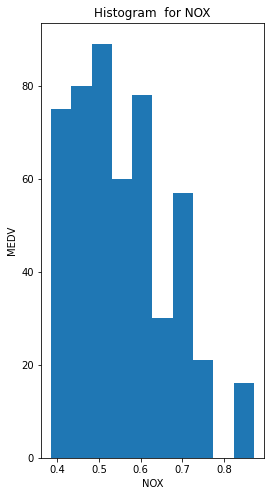

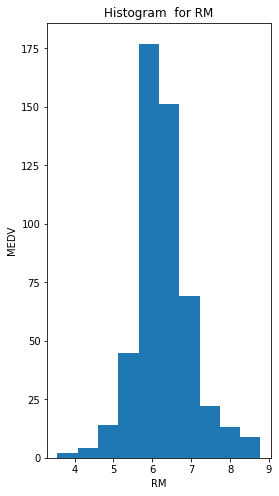

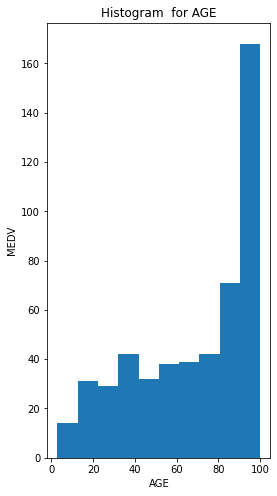

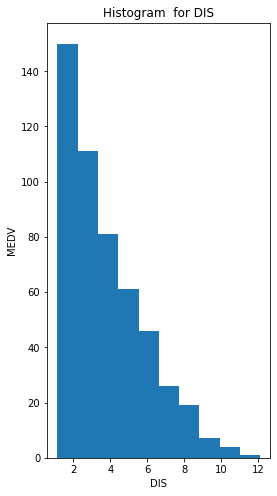

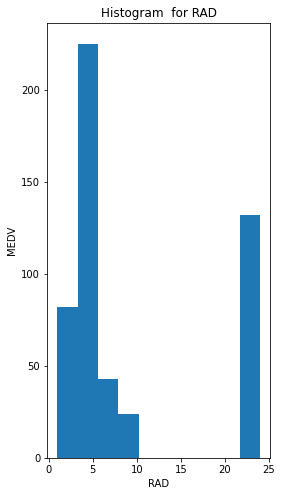

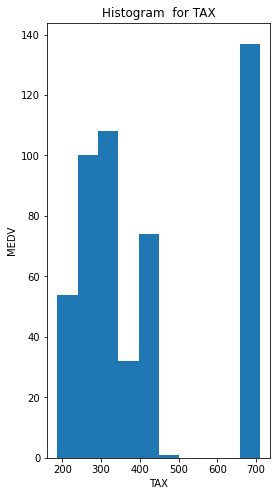

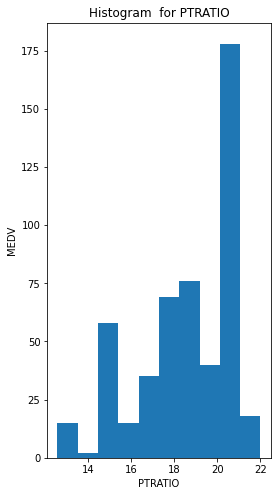

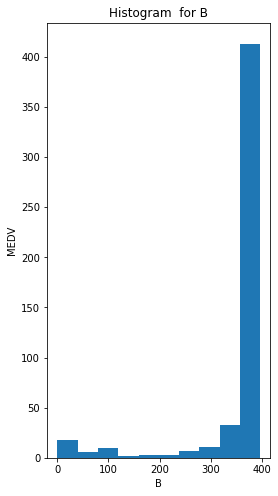

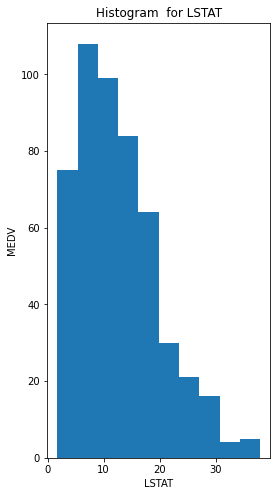

In [48]:
# Visualize the distribution of the data
label = data[data.columns[-1]]
features = data[data.columns[:-1]]
for col in features:
    fig, ax = plt.subplots(figsize=(4,8))
    ax.hist(data[col])
    ax.set_xlabel(col)
    ax.set_ylabel("MEDV")
    ax.set_title(f"Histogram  for {col}")
    plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Split the data
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state = 21)

# Process the data
numerical_features = [col for col in features.columns if features[col].dtype in ['int64', 'float64']]

num_transformer = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])

preprocessor = ColumnTransformer(
            transformers=[('num', num_transformer, numerical_features)], remainder = 'passthrough')

# Define the models to be used
models = {"Linear Regression": LinearRegression(),
         "Random Forest Regressor": RandomForestRegressor()
         }

model_results = {}

# Pass the models into the pipeline
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Perform hyperparameter tuning
    if name == "Random Forest Regression":
        param_grid = {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [5, 10, 15]
        }
        grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        # Train the models
        pipeline.fit(X_train, y_train)
        best_model = pipeline
        
    # Evaluate model
    predictions = best_model.predict(X_test)
    # Define and display metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    model_results[name] = {'RMSE':rmse,'R2':r2}
    df_results = pd.DataFrame(model_results)
    
    
print(df_results)

      Linear Regression  Random Forest Regressor
RMSE           5.179324                 3.148931
R2             0.714936                 0.894629
